In [1]:
#This notebook checks the Planck lensing data

import numpy as np
import matplotlib.pylab as plt
import healpy as hp
from colossus.cosmology import cosmology
import scipy.interpolate as I
from src.template_generator import *
from pylab import arange, show, cm

%matplotlib inline

/Users/jens/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/jens/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
#read data and calculate kappa and phi map
mask=hp.read_map('/Users/jens/Downloads/data/mask.fits.gz')
alms=hp.read_alm('/Users/jens/Downloads/data/dat_klm.fits')
l, m = hp.Alm.getlm(lmax=2048)
k_map = hp.sphtfunc.alm2map(alms,nside=2048)
alms*=1./(l*(l+1))*2
alms[0]=0.
phi_map = hp.sphtfunc.alm2map(alms,nside=2048)

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/Users/jens/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/jens/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


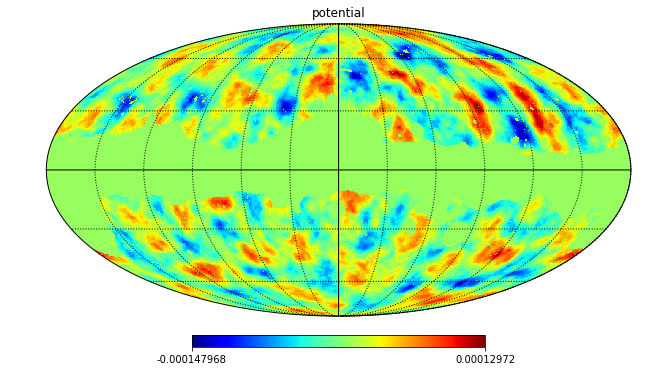

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


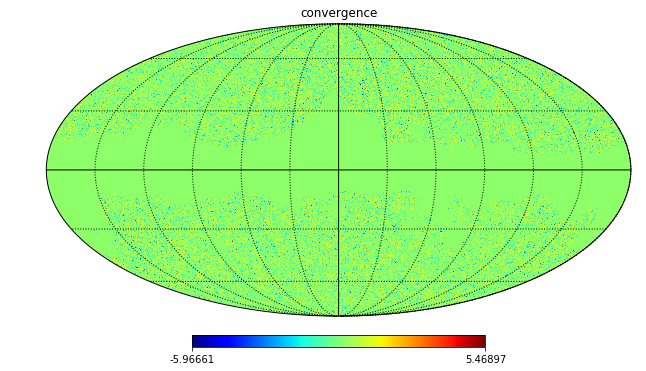

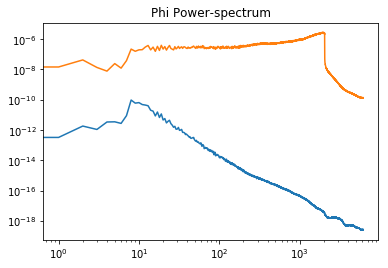

In [3]:
cmap = cm.jet
cmap.set_under('w')

hp.mollview(phi_map*mask,cmap=cmap, title='potential')
hp.graticule()
plt.show()

hp.mollview(k_map*mask,cmap=cmap, title='convergence')
hp.graticule()
plt.show()


cl_phi=hp.sphtfunc.anafast(phi_map*mask)
cl_k=hp.sphtfunc.anafast(k_map*mask)

ell = np.arange(len(cl_phi))


plt.title('Phi Power-spectrum')
plt.loglog(ell, cl_phi,label='phi')
plt.loglog(ell, cl_k,label='kappa')

#plt.xlabel(r'$l$'); plt.ylabel(r'$(l(l+1))^2/(2\pi)\,C_l$'); plt.grid()
#plt.legend()
plt.show()




In [4]:
def change_coord(m, coord):
    """ Change coordinates of a HEALPIX map

    Parameters
    ----------
    m : map or array of maps
      map(s) to be rotated
    coord : sequence of two character
      First character is the coordinate system of m, second character
      is the coordinate system of the output map. As in HEALPIX, allowed
      coordinate systems are 'G' (galactic), 'E' (ecliptic) or 'C' (equatorial)

    Example
    -------
    The following rotate m from galactic to equatorial coordinates.
    Notice that m can contain both temperature and polarization.
    >>>> change_coord(m, ['G', 'C'])
    """
    # Basic HEALPix parameters
    npix = m.shape[-1]
    nside = hp.npix2nside(npix)
    ang = hp.pix2ang(nside, np.arange(npix))

    # Select the coordinate transformation
    rot = hp.Rotator(coord=reversed(coord))

    # Convert the coordinates
    new_ang = rot(*ang)
    new_pix = hp.ang2pix(nside, *new_ang)

    return m[..., new_pix]

mask_sdss=hp.read_map('/Volumes/Storage/cosmology/sdss3/sdss3_dr12_mask/healpix_mask_LOWZ_North.fits')+hp.read_map('/Volumes/Storage/cosmology/sdss3/sdss3_dr12_mask/healpix_mask_LOWZ_South.fits')
mask_sdss*=(hp.read_map('/Volumes/Storage/cosmology/sdss3/sdss3_dr12_mask/healpix_mask_CMASS_North.fits')+hp.read_map('/Volumes/Storage/cosmology/sdss3/sdss3_dr12_mask/healpix_mask_CMASS_South.fits'))
foo=np.where(mask_sdss>0)
mask_sdss[foo]=1

mask_sdss=hp.pixelfunc.ud_grade(mask_sdss, nside_out=256)
mask_new=change_coord(mask_sdss, 'CG')

NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


/Users/jens/anaconda3/lib/python3.6/site-packages/healpy/fitsfunc.py:326: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  "assume {}".format(schm))


NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT
NSIDE = 2048
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


In [6]:
data = np.load('borg_kappa_maps.npz')
map_borg_k=data['kappa'][8]

alm = hp.map2alm(map_borg_k*mask_new) # spherical armonic transform
lmax=hp.Alm.getlmax(len(alm))
print(lmax)
l, m = hp.Alm.getlm(lmax=lmax)
alm*=1./(l*(l+1))*2
alm[0]=0.
phi_borg_map = hp.sphtfunc.alm2map(alm,nside=256)

767
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


/Users/jens/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/jens/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


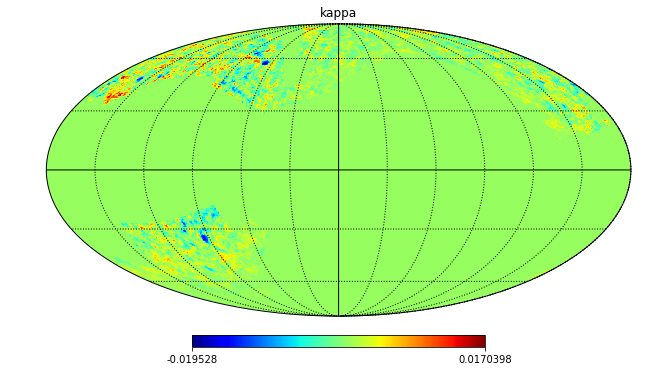

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


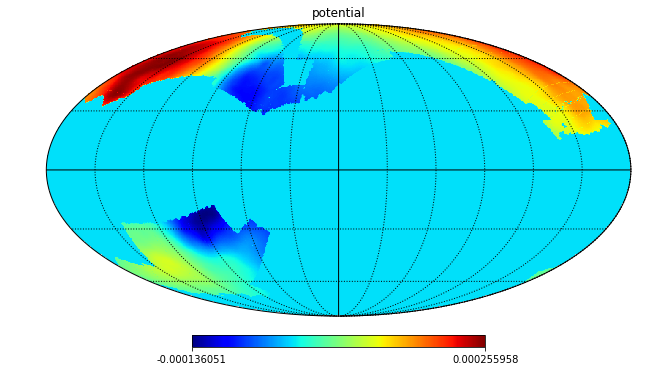

In [7]:
hp.mollview(map_borg_k*mask_new,cmap=cmap, title='kappa')
hp.graticule()
plt.show()


hp.mollview(phi_borg_map*mask_new,cmap=cmap, title='potential')
hp.graticule()
plt.show()



0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


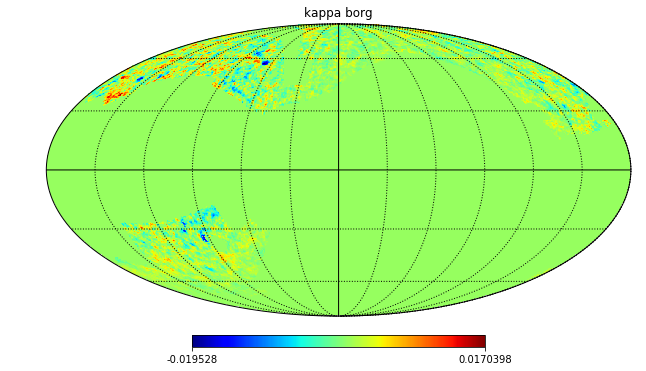

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


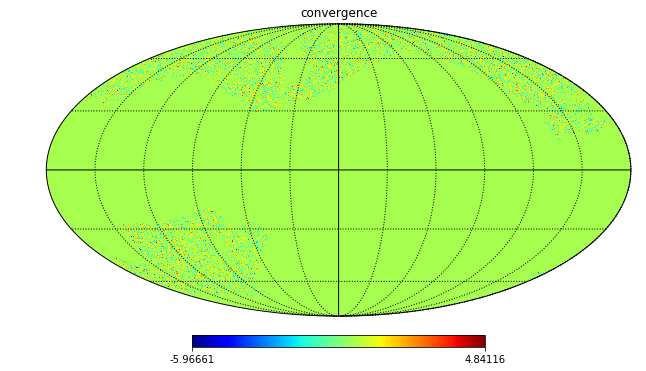

In [8]:
aux=hp.pixelfunc.ud_grade(map_borg_k*mask_new, nside_out=2048)
aux1=hp.pixelfunc.ud_grade(mask_new, nside_out=2048)
hp.mollview(aux*mask,cmap=cmap, title='kappa borg')
hp.graticule()
plt.show()


hp.mollview(k_map*mask*aux1,cmap=cmap, title='convergence')
hp.graticule()
plt.show()



In [13]:
#process files
data = np.load('borg_kappa_maps.npz')
xmin=-0.015
xmax=0.015

res=[]
for m in data['kappa']:
    aux=hp.pixelfunc.ud_grade(m, nside_out=2048)
    foo=np.where(mask*aux1>0.0) #only take non-masked pixel
    a1=aux[foo][::1]
    a2=k_map[foo][::1]
    nn1, bin_edges = np.histogram(a1, bins=20, range=[xmin,xmax])
    ww1, bin_edges = np.histogram(a1, weights=a2, bins=20, range=[xmin,xmax])
    res.append(ww1/(nn1).astype(float))

data = np.load('theory_kappa_maps.npz')  
res_th=[]
for m in data['kappa']:
    aux=hp.pixelfunc.ud_grade(m, nside_out=2048)
    foo=np.where(mask*aux1>0.0) #only take non-masked pixel
    a1=aux[foo][::1]
    a2=k_map[foo][::1]
    nn1, bin_edges = np.histogram(a1, bins=20, range=[xmin,xmax])
    ww1, bin_edges = np.histogram(a1, weights=a2, bins=20, range=[xmin,xmax])
    res_th.append(ww1/(nn1).astype(float))
    
bincenters = 0.5*(bin_edges[1:]+bin_edges[:-1])

In [11]:
xmin=-0.015
xmax=0.015
nn1, bin_edges = np.histogram(a1, bins=15, range=[xmin,xmax])
ww1, bin_edges = np.histogram(a1, weights=a2, bins=15, range=[xmin,xmax])
bincenters = 0.5*(bin_edges[1:]+bin_edges[:-1])

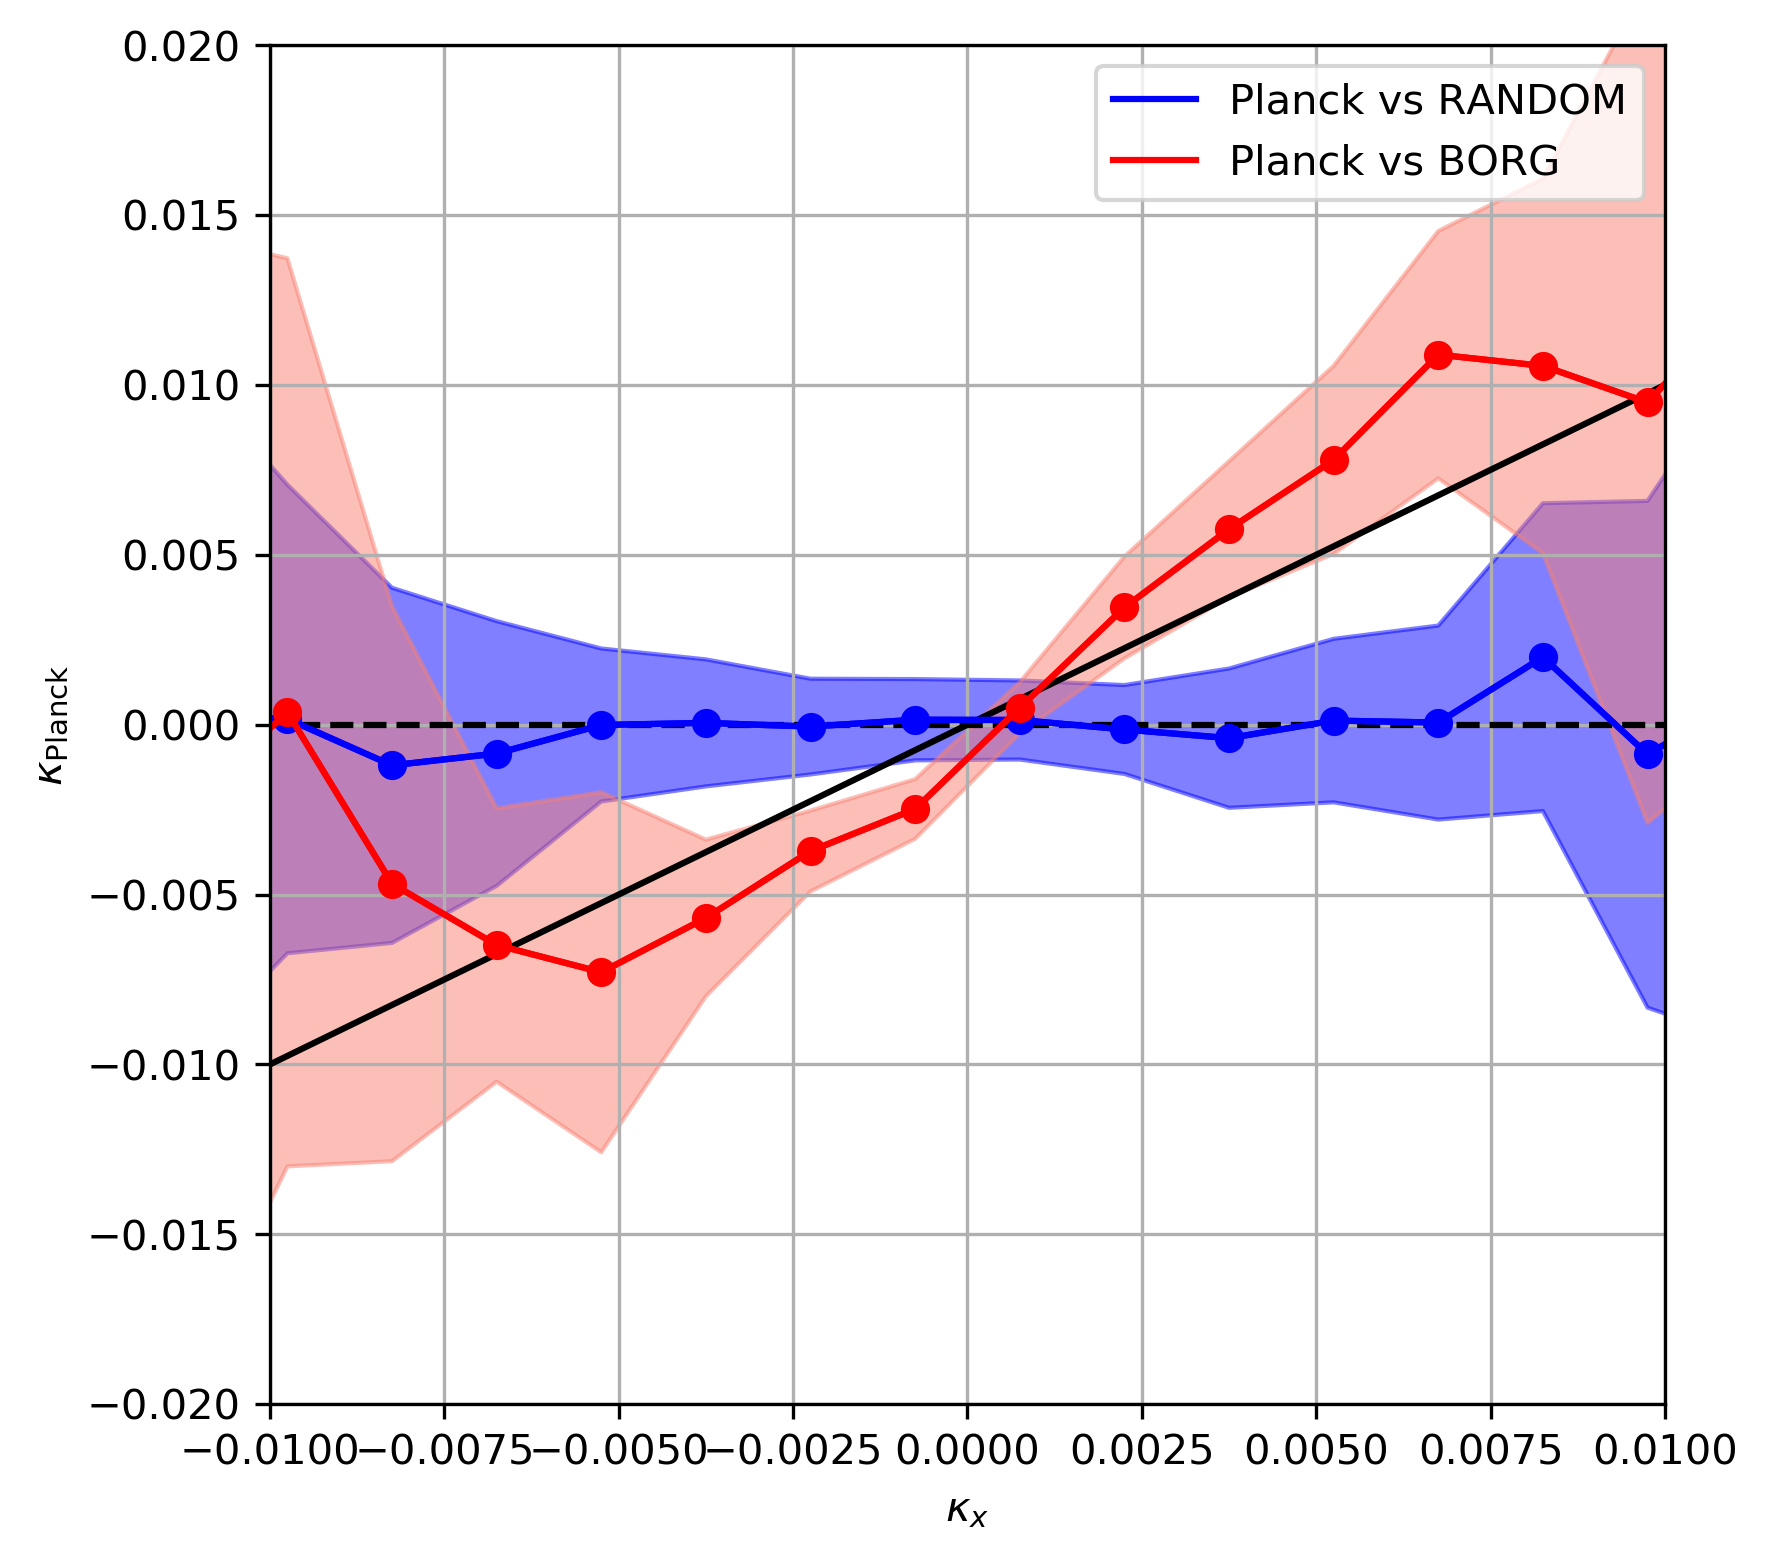

In [16]:
#plt.plot(bincenters,ww0/(nn0).astype(float))
#plt.plot(bincenters,ww0/(nn0).astype(float), label='Planck vs random theory')

mean=np.average(np.array(res),axis=0)
std=np.std(np.array(res),axis=0)

mean_th=np.average(np.array(res_th),axis=0)
std_th=np.std(np.array(res_th),axis=0)


fig, ax = plt.subplots(figsize=(6,6),dpi=300)


ax.plot(bincenters,bincenters*0, color='black', ls='--')
ax.plot(bincenters,bincenters, color='black')

ax.plot(bincenters,mean_th, label='Planck vs RANDOM',color='blue')
ax.plot(bincenters,mean_th, marker='o',color='blue')
ax.fill_between(bincenters, mean_th-std_th, mean_th+std_th, color='blue',alpha=0.5)

ax.plot(bincenters,mean, label='Planck vs BORG',color='red')
ax.plot(bincenters,mean, marker='o',color='red')
ax.fill_between(bincenters, mean-std, mean+std, color='salmon',alpha=0.5)

ax.set_ylim([-0.02,0.02])
ax.set_xlim([-0.01,0.01])


plt.legend()

plt.xlabel(r'$\kappa_{x}$'); plt.ylabel((r'$\kappa_{\rm{Planck}}$')); plt.grid()